In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file with SMILES strings
csv_file = 'E:/project/2-2/data_h.csv'
df = pd.read_csv(csv_file)

# Query SMILES
query_smiles = 'CN1C=C(C=N1)C1=CN2N=CN=C(N3CCN(CC3)C3=NC=C(C=N3)[C@@](C)(N)C3=CC=C(F)C=C3)C2=C1'
query_mol = Chem.MolFromSmiles(query_smiles)

# Lists to store similarity scores
tanimoto_scores = []
dice_scores = []
russell_rao_scores = []



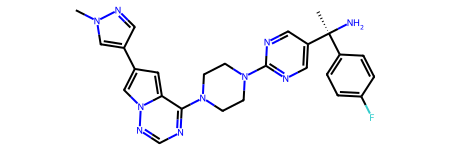

In [3]:
query_mol

In [4]:
for smiles in df['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp1 = AllChem.GetMorganFingerprint(query_mol, 2)
        fp2 = AllChem.GetMorganFingerprint(mol, 2)
        
        # Convert Morgan fingerprints to numpy arrays
        np_fp1 = np.array(fp1)
        np_fp2 = np.array(fp2)
        
        # Tanimoto coefficient
        tanimoto_score = DataStructs.TanimotoSimilarity(fp1, fp2)
        tanimoto_scores.append(tanimoto_score)
        
        # Dice coefficient
        dice_score = DataStructs.DiceSimilarity(fp1, fp2)
        dice_scores.append(dice_score)
        
        #russel rao
        russell_rao_score = DataStructs.DiceSimilarity(fp1, fp2)
        russell_rao_scores.append(russell_rao_score)
        
    else:
        tanimoto_scores.append(None)
        dice_scores.append(None)
        russell_rao_scores.append(None)
        
# Add similarity scores to the dataframe
df['Tanimoto'] = tanimoto_scores
df['Dice'] = dice_scores
df['russel_rao']=russell_rao_scores

# Display the dataframe with similarity scores
print(df)

                                              SMILES  Tanimoto      Dice  \
0     CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2  0.081081  0.150000   
1      CCC(=O)O[C@]1(CC[NH+](C[C@@H]1CC=C)C)c2ccccc2  0.084967  0.156627   
2               C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]  0.086957  0.160000   
3         C[C@H](Cc1ccccc1)[NH2+][C@@H](C#N)c2ccccc2  0.117241  0.209877   
4     C[C@@H](CC(c1ccccc1)(c2ccccc2)C(=O)N)[NH+](C)C  0.150685  0.261905   
...                                              ...       ...       ...   
2543                       Cc1ccc(cc1)CNC(=O)c2ccco2  0.108696  0.196078   
2544             C[C@@H]1CN(C[C@H](O1)C)C(=O)c2ccco2  0.071942  0.134228   
2545             C[C@H]1CN(C[C@@H](O1)C)C(=O)c2ccco2  0.071942  0.134228   
2546                  Cc1cccc(c1C)NC(=O)c2cccc(c2)OC  0.134752  0.237500   
2547                   CN(c1ccccc1)C(=O)c2cccc(c2)OC  0.136691  0.240506   

      russel_rao  
0       0.150000  
1       0.156627  
2       0.160000  
3       0.2

In [7]:
df.describe()

,Tanimoto,Dice,russel_rao
count,2548.000000,2548.000000,2548.000000
mean,0.118848,0.210639,0.210639
std,0.035678,0.056778,0.056778
min,0.015038,0.029630,0.029630
25%,0.091603,0.167832,0.167832
50%,0.120150,0.214525,0.214525
75%,0.141844,0.248447,0.248447
max,0.283582,0.441860,0.441860


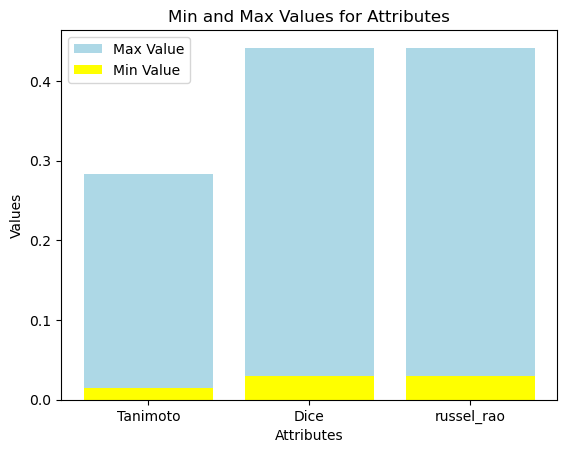

In [9]:
import matplotlib.pyplot as plt

# Sample data: Attribute values
attributes = ['Tanimoto', 'Dice', 'russel_rao']
min_values = [0.015038, 0.029630, 0.029630]
max_values = [0.283582, 0.441860, 0.441860]

# Create a bar plot
plt.bar(attributes, max_values, color='lightblue', label='Max Value')
plt.bar(attributes, min_values, color='yellow', label='Min Value')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Min and Max Values for Attributes')
plt.legend()
plt.show()


In [10]:
df.info

<bound method DataFrame.info of                                               SMILES  Tanimoto      Dice  \
0     CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2  0.081081  0.150000   
1      CCC(=O)O[C@]1(CC[NH+](C[C@@H]1CC=C)C)c2ccccc2  0.084967  0.156627   
2               C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]  0.086957  0.160000   
3         C[C@H](Cc1ccccc1)[NH2+][C@@H](C#N)c2ccccc2  0.117241  0.209877   
4     C[C@@H](CC(c1ccccc1)(c2ccccc2)C(=O)N)[NH+](C)C  0.150685  0.261905   
...                                              ...       ...       ...   
2543                       Cc1ccc(cc1)CNC(=O)c2ccco2  0.108696  0.196078   
2544             C[C@@H]1CN(C[C@H](O1)C)C(=O)c2ccco2  0.071942  0.134228   
2545             C[C@H]1CN(C[C@@H](O1)C)C(=O)c2ccco2  0.071942  0.134228   
2546                  Cc1cccc(c1C)NC(=O)c2cccc(c2)OC  0.134752  0.237500   
2547                   CN(c1ccccc1)C(=O)c2cccc(c2)OC  0.136691  0.240506   

      russel_rao  
0       0.150000  
1       0.156627 

In [11]:

similar_molecules = df[df['russel_rao'] > 0.38]

# Display the extracted rows
display(similar_molecules)

,SMILES,Tanimoto,Dice,russel_rao
936,c1cc(ccc1c2c(n(cn2)C3CC[NH2+]CC3)c4ccnc(n4)N)F,0.241379,0.388889,0.388889
976,c1ccc2c(c1)nc(n2Cc3ccc(cc3)F)N4CC[NH2+]CC4,0.241135,0.388571,0.388571
1151,c1cc(ccc1[C@H](CCC[NH+]2CCN(CC2)c3ncc(cn3)F)O)F,0.278571,0.435754,0.435754
1338,c1ccc2c(c1)CC[C@@H](O2)C[NH2+]Cc3cc(cnc3)c4ccc...,0.234899,0.380435,0.380435
1484,COc1ccc(cc1)c2cnc3c(cnn3c2)c4ccsc4,0.246377,0.395349,0.395349
1485,COc1ccc(cc1)c2cnc3c(cnn3c2)c4cccnc4,0.268116,0.422857,0.422857
1973,COc1cccc(c1C(=O)N2CCN(CC2)c3ccc(cc3)F)OC,0.262411,0.415730,0.415730
2020,c1cc(sc1)C(=O)N2CCN(CC2)c3ccc(cc3)F,0.250000,0.400000,0.400000
2135,CS(=O)(=O)N1CCN(CC1)c2ccc(cc2)F,0.241935,0.389610,0.389610
2482,Cc1ccc(cc1C)C(=O)N2CCN(CC2)c3ccc(cc3)F,0.283582,0.441860,0.441860


In [12]:
df.to_csv("E:/project/2-2/data_r.csv",index=False)